In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=2,suppress=True)

In [2]:
# X = np.random.randint(10, size=50)
# y = np.random.randint(10, size=50)

In [3]:
X = np.array([2,6,18,24,56,8,19,67,0,47])
y = np.array([3,14,25,36,60,3,15,50,7,35])

<AxesSubplot:>

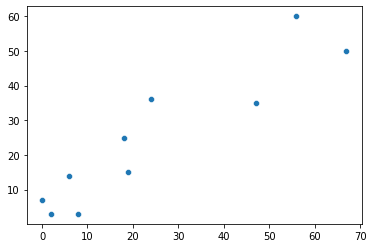

In [4]:
sns.scatterplot(x=X,y=y)

In [5]:
np.set_printoptions(precision=2)

# Gradient Descent from scratch 

In [6]:
m = 0
c = 0
# print(y - ((m*X) + c))
alpha = 0.0001
n = len(X)

for _ in range(50):
    y_pred = m*X + c
#     print(y_pred)
    error = y - y_pred
    obj = 1/n*(np.sum(np.square(error)))
    del_m = -(2/n) * X.T.dot(error)
    del_c = -(2/n) * np.sum(error)
    m = m - (alpha*del_m)
    c = c - (alpha*del_c)
#     print(obj)
    

In [7]:
print(m,c)

0.8980507428267216 0.04561204615719283


In [8]:
y0 = m*X + c

In [9]:
# sns.scatterplot(x=X,y=y0)

# Using scikit-learn

In [10]:
X1 = np.reshape(X,(-1,1))
reg = LinearRegression().fit(X1, y)

In [11]:
print(reg.score(X1, y))
print(reg.coef_)
print(reg.intercept_)

0.8507334210831263
[0.77]
5.699299739118484


In [12]:
y1 = reg.coef_*X + reg.intercept_

# Using Tensorflow

In [13]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu",input_shape=(1,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])

In [14]:
model.summary()
history = model.fit(X,y,epochs = 50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 654ms/step - loss: 799.6430 - mean_squared_error: 799.6430 - mean_absolute_error: 22.5551
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 751.1098 - mean_squared_error: 751.1098 - mean_absolute_error: 21.8785
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 704.6849 - mean_squared_error:

In [15]:
y2 = model.predict(X)
y2 = np.squeeze(y2)
print(y2)

[ 2.12  5.77 16.71 22.18 51.35  7.6  17.63 61.38  0.29 43.15]


<AxesSubplot:>

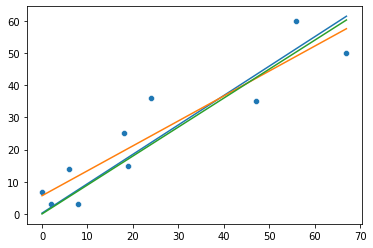

In [16]:
sns.lineplot(x=X,y=y2)
sns.lineplot(x=X,y=y1)
sns.lineplot(x=X,y=y0)
sns.scatterplot(x=X,y=y)

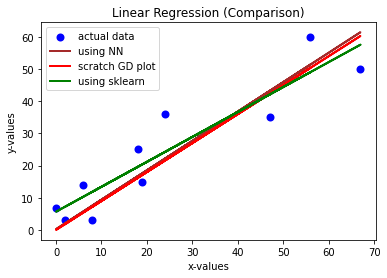

In [17]:
plt.scatter(X, y, c = 'blue', linewidth=2, label='actual data')
plt.plot(X, y2, c = 'brown', linewidth=2, label='using NN')
plt.plot(X, y0, c = 'red', linewidth=2, label='scratch GD plot')
plt.plot(X, y1, 'green', linewidth=2, label='using sklearn')
plt.legend()
plt.title('Linear Regression (Comparison)')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

In [18]:
mean_y = np.mean(y)
r_score = []
r = 0
r = 1 - (np.sum((y-y0)**2)/np.sum((y-mean_y)**2))
r_score.append(r)  
r = 1 - (np.sum((y-y1)**2)/np.sum((y-mean_y)**2))
r_score.append(r)
r = 1 - (np.sum((y-y2)**2)/np.sum((y-mean_y)**2))
r_score.append(r)
print(r_score)

[0.8101290037059676, 0.8507334210831263, 0.8125257521368128]


In [19]:
mse = []
n = len(y)
mse.append(np.sum((y-y0)**2)/n)  
mse.append(np.sum((y-y1)**2)/n)
mse.append(np.sum((y-y2)**2)/n)
print(mse)

[68.04217023192942, 53.491171220650834, 67.1832714642518]


In [20]:
mae = []
n = len(y)
mae.append(np.sum(abs(y-y0))/n)  
mae.append(np.sum(abs(y-y1))/n)
mae.append(np.sum(abs(y-y2))/n)
print(mae)

[7.334055190662087, 6.61590004119182, 7.332238945364952]


In [21]:
print("-------------Using GD ----- Using Scikit-learn ------- Using NN")
print("MSE     = ",mse[0],'|',mse[1],'|',mse[2])
print("MAE     = ",mae[0],'|',mae[1],'|',mae[2])
print("R_Score = ",r_score[0],'|',r_score[1],'|',r_score[2])

-------------Using GD ----- Using Scikit-learn ------- Using NN
MSE     =  68.04217023192942 | 53.491171220650834 | 67.1832714642518
MAE     =  7.334055190662087 | 6.61590004119182 | 7.332238945364952
R_Score =  0.8101290037059676 | 0.8507334210831263 | 0.8125257521368128
